*31.10.2024* - IGU MYO BILGISAYAR TEKNOLOJISI PROGRAMI AI DERSI (5.Hafta )

In [10]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import os
os.chdir('/content/drive/My Drive/Ai_Ders_IGU_2024')
!pwd

/content/drive/My Drive/Ai_Ders_IGU_2024


## - < FEATURE > NEDİR  >

*featurlar kırmızı alan ile çevrilmiş yani veri kümesinde bir gözlemi tanımlayan veya açıklayan bir değişkendir.*
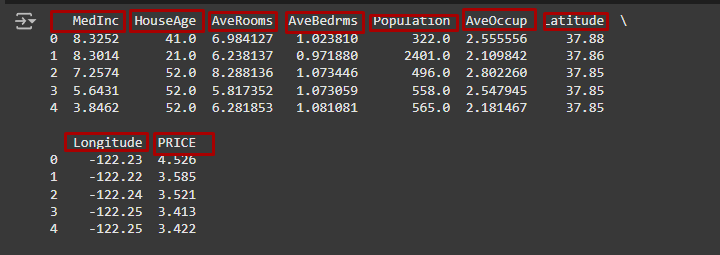

# Makine Öğrenimi ile Regresyon Modeli Oluşturma

In [50]:
from sklearn.datasets import fetch_california_housing
## -- ^ Bu veri seti, Kaliforniya'daki konut özelliklerini,fiyatlarını içerir ve regresyon problemleri için örnektir.
from sklearn.model_selection import train_test_split
## -- ^ Veriyi eğitim(Modelin öğrenmesi) ve test (Modelin performansını değerlendirmek) setlerine ayırmak için kullanılan fonksiyonu içe aktarır.
from sklearn.linear_model import LinearRegression
## -- ^ İki değişken arasındaki ilişkiyi ölçmek için kullanılan analiz metodudur.
from sklearn.metrics import mean_squared_error, r2_score
## -- ^ Tahmin edilen değerler ile gerçek değerler arasındaki ortalama kare hatayı hesaplar.
## -- ^ r2_score: Modelin, veriyi ne kadar iyi açıkladığını gösteren ölçüdür. 1'e yakın değerler modelin veriyi çok iyi açıkladığını gösterir
import pandas as pd
## -- ^ Veri analizi ve manipülasyonu için kullanılan bir kütüphanedir.

In [51]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target ## -- housing.target içindeki konut fiyatlarını df'ine PRICE adında yeni bir sütun olarak ekler.
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
X = df.drop('PRICE', axis=1) ## -- Modelin girdi olarak kullanacağı özellikleri içeririr. ( medyan gelir,ev yaşı,oda sayısı vs..)
y = df['PRICE'] ## -- Modelin tahmin etmeye çalışacağı hedef değişkendir, 'price' alındığı için konut fiyatları hedef değişkendir.
## -- ^ Veri setindeki özellikleri (bağımsız değişkenler) ve hedef değişkeni (bağımlı değişken) ayırma işlemidir.

In [53]:
## -- train_test_split fonksiyonu :  verilen veri setini iki parçaya ayırır: eğitim verisi ve test verisi.
## -- test_size=0.3: Bu parametre, veri setinin ne kadarının test verisi olarak ayrılacağını belirler.  (0.3 * 100 )
## -- Geri kalan %70, eğitim verisi olarak kullanılacaktır.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Training and testing calculation rates
we have %100 :

- if %80 train => %20 test (80 eğitim , 20 test)

- else %70 train => %30 test (70 eğitim , 30 test)

### MSE Nedir ?
-  Tahmin edilen değerlerle gerçek değerler arasındaki farkların karesinin ortalamasını alarak hesaplanan bir hata ölçüsüdür.

### R² (R-Kare) Değerleri :

#### bağımlı değişken = y , bağımsız değişken = x
### a-) 0 Değeri :
- (y), (x) ile olan ilişkisinde, model y değerindeki değişkenliği açıklamakta başarısızdır.
- Modelin tahminleri, ortalama tahminden daha iyi değildir.

### b-) 0 - 0.5 Arası :
- Model, (y) değişkenliğin %0 ile %50'sini açıklıyor.
- Model'in  performansı zayıf kabul edilir

### c-) 0.5 - 0.8 Arası :
- Model, (y) değerinde ki değişkenliğin %50 ile %80'ini açıklıyor.
- Model'in performansı kabul edilebilir.

### d-) 0.8 - 1 Arası :
- Model, (y) değerindeki değişkenliğin %80 ile %100'ünü açıklıyor.
- Model'in performansı oldukça iyidir.

### e-) 1 Değeri :
- Model, (y) değerindeki değişkenin tüm değişkenliğini iyi açıklar. Ancak, bu genellikle nadiren görülür ve modelin aşırı öğrenme (overfitting) göstermesi anlamına gelebilir.



In [54]:
## -- Model oluşturma
model = LinearRegression() ## -- scikit-learn lib'de lineer regresyon modeli
model.fit(X_train, y_train) ## -- fit metodu : Modelin girdi (özellikler) ile çıktı (hedef) arasındaki ilişkiyi öğrenmesini sağlar.

## -- Tahmin yapma
predictions = model.predict(X_test) ## -- Model nesnesinin predict metodunu kullanarak test veri setindeki (X_test) için tahminler yapar.
print("Forecast Result : ", predictions[:5]) ## -- Tahmin edilen fiyatların ilk 5 değerini ekrana yazdırır.
print("Actual Values : ", y_test[:5].values) ## -- Test veri setindeki, gerçek ilk 5 değerini yazdırır,tahmin ve gerçek arasındaki farkı görmek için

## -- Sistemin Ortalama Hatası (MSE)
mse = mean_squared_error(y_test, predictions) ## -- mean_squared_error fonksiyonunu kullanır, test verisi(y) ile modelin tahminleri (predictions) arasındaki MSE'yi hesaplar.
print("Mean Squared Error (MSE) Sonucu:", mse) ## -- hatanın (mse) düşük olması modelin tahminlerin gerçek değerlere yakın olduğunu gösterir.

## -- Sistemin R-kare Hatası (R²)
r2 = r2_score(y_test, predictions) ## -- r2_score fonksiyonunu kullanarak test verisi (y_test) ile (predictions) arasındaki R² değerini hesaplar.
print("R-squared (R²) Sonucu:", r2) ## -- R²'nin yüksek olması, modelin daha iyi tahminler yaptığını gösterir.

Forecast Result :  [0.72604907 1.76743383 2.71092161 2.83514727 2.60695807]
Actual Values :  [0.477   0.458   5.00001 2.186   2.78   ]
Mean Squared Error (MSE) Sonucu: 0.5305677824766758
R-squared (R²) Sonucu: 0.595770232606166


# TensorFlow Library <>

In [55]:
!pip install tensorflow
!apt-get install graphviz
!pip install pydot

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


*MNIST Veri Seti: 28x28 piksel boyutunda el yazısı rakamlarının bulunduğu bir veri setidir.*


In [69]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist ## -- MNIST el yazısı rakamları veri setini yüklemek için kullanılan bir modül.
from tensorflow.keras.utils import plot_model ## -- plot_model : Model mimarisini görselleştirmek için kullanılır.

(x_train, y_train), (x_test, y_test) = mnist.load_data() # MNIST veri setini yükleme
x_train, x_test = x_train / 255.0, x_test / 255.0
## -- ^ Görüntü verileri 0-255 aralığındadır. Bu değerler, 0-1 aralığına ölçeklenir, bu da modelin daha iyi öğrenmesini sağlar.
!pwd

/content/drive/MyDrive/Ai_Ders_IGU_2024


## * Sequential Layers ( sequential katmanları )
baştan sona doğru
### Input Layer ( giriş katmanı ) :
> Modelin alacağı verilerin boyutunu tanımlar.

### Flatten Layer ( düzleştirme katmanı ) :
> Çok boyutlu verileri 1d vektörlere dönüştürür.

### Dense Layer ( tam bağlı katman ) :
> Her düğüm, bir önceki katmandan gelen tüm düğümlerle tam bağlantıdadır.Ağırlıkları öğrenerek karmaşık ilişkileri modellemeye yardım eder.

### Dropout Layer ( bırakma katmanı ) :
> Overfitting önlemek için bazı verileri random devre dışı bırakır. Train sırasında kullanılmaz.

### Output Layer ( çıkış katmanı ) :
> Modelin tahminlerini üretir. Sınıflandırma problemlerinde genellikle sınıf sayısı kadar düğüm içerir.


## * Activation Functions ( aktivasyon fonksiyonları )
Bir düğümün çıkışını belirlemek için kullanılır. Modelin öğrenme yeteneğini artırarak karmaşık fonksiyonları öğrenmesine yardımcı olur.
### ReLU (Rectified Linear Unit) :
> Negatif değerleri sıfıra döndürür, pozitif değerleri olduğu gibi geçirir.

### Sigmoid :
> Çıktıyı 0 ile 1 arasında sıkıştırır.

### Softmax :
> Çok sınıflı sınıflandırma problemlerinde kullanılır.Çıktıları 0 ile 1 arasında normalize eder ve toplamının 1 olmasını sağlar. Her sınıfa ait olasılık değerleri üretir.

### Tanh (Hiperbolik Tangent) :
> Çıktıyı -1 ile 1 arasında sıkıştırır.










#### Aktivasyon Fonksiyonları Nasıl Seçilir ?
*Çıktı katmanlarında kullanacağımız fonksiyonu seçmek gizli katmana göre biraz daha kolay çünkü yapacağımız tahmine göre uygun aktivasyon fonksiyonumuzu kullanıyoruz. Gizli katmanlarda ise kullanacağımız fonksiyonu deneme yanılma yöntemi ile seçeriz. Modelimizi farklı aktivasyon fonksiyonlarını kullanarak eğitip en iyi performans aldığımız fonksiyon ile yolumuza devam edebiliriz.*

In [70]:
## --  Modeli oluşturma
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)), ## -- Modelin alacağı verilerin boyutunu tanımlar.
    layers.Dense(128, activation='relu'), ## -- Modelin öğrenme yeteneğini artırır.
    layers.Dropout(0.2), ## -- Overfitting önlemek için kullanılan bir teknik. %20 si random devre dışı bırakılmıştır.
    layers.Dense(10, activation='softmax') ## -- Modelin tahminlerini ürettiği son katmandır.
])
## -- Keras'ın Sequential modeli, katmanları ardışık bir şekilde dizmek için kullanılır.
## -- Her katman, bir önceki katmanın çıktısını alır ve kendi çıktısını üretir.

In [71]:
## --  Modeli derleme
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
## -- Optimizer (Optimizasyon): Modelin ağırlıklarını güncellemek için kullanılan algoritmadır.
## -- 'adam' : Öğrenme oranını otomatik olarak ayarlayan optimizasyon yöntemidir. Hızlı ve etkili bir öğrenme sağlar.
## -- Loss Function (Kayıp Fonksiyonu): Modelin tahminlerinin gerçek etiketlerle ne kadar iyi uyuştuğunu ölçen fonksiyondur.
## -- Sparse Categorical Crossentropy: Etiketlerin (integer) formatta olduğu durumlarda kullanılır. Her sınıf için tahmin edilen olasılıkları değerlendirir.
## -- Metrics (Performans Göstergeleri): Modelin eğitim ve test süreçlerini değerlendirilecek performans ölçütleri.
## -- Accuracy (Doğruluk): Modelin doğru tahminlerinin toplam tahmin sayısına oranı.

#### Modelin eğitim süreci
model eğitim işlemi --> model.fit()

model eğitim işlemi --> model.fit(x_train, y_train, ...)

Eğitim Adım Sayısı --> epochs=5

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8652 - loss: 0.4713
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9546 - loss: 0.1547
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9674 - loss: 0.1090
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9733 - loss: 0.0914
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9763 - loss: 0.0772


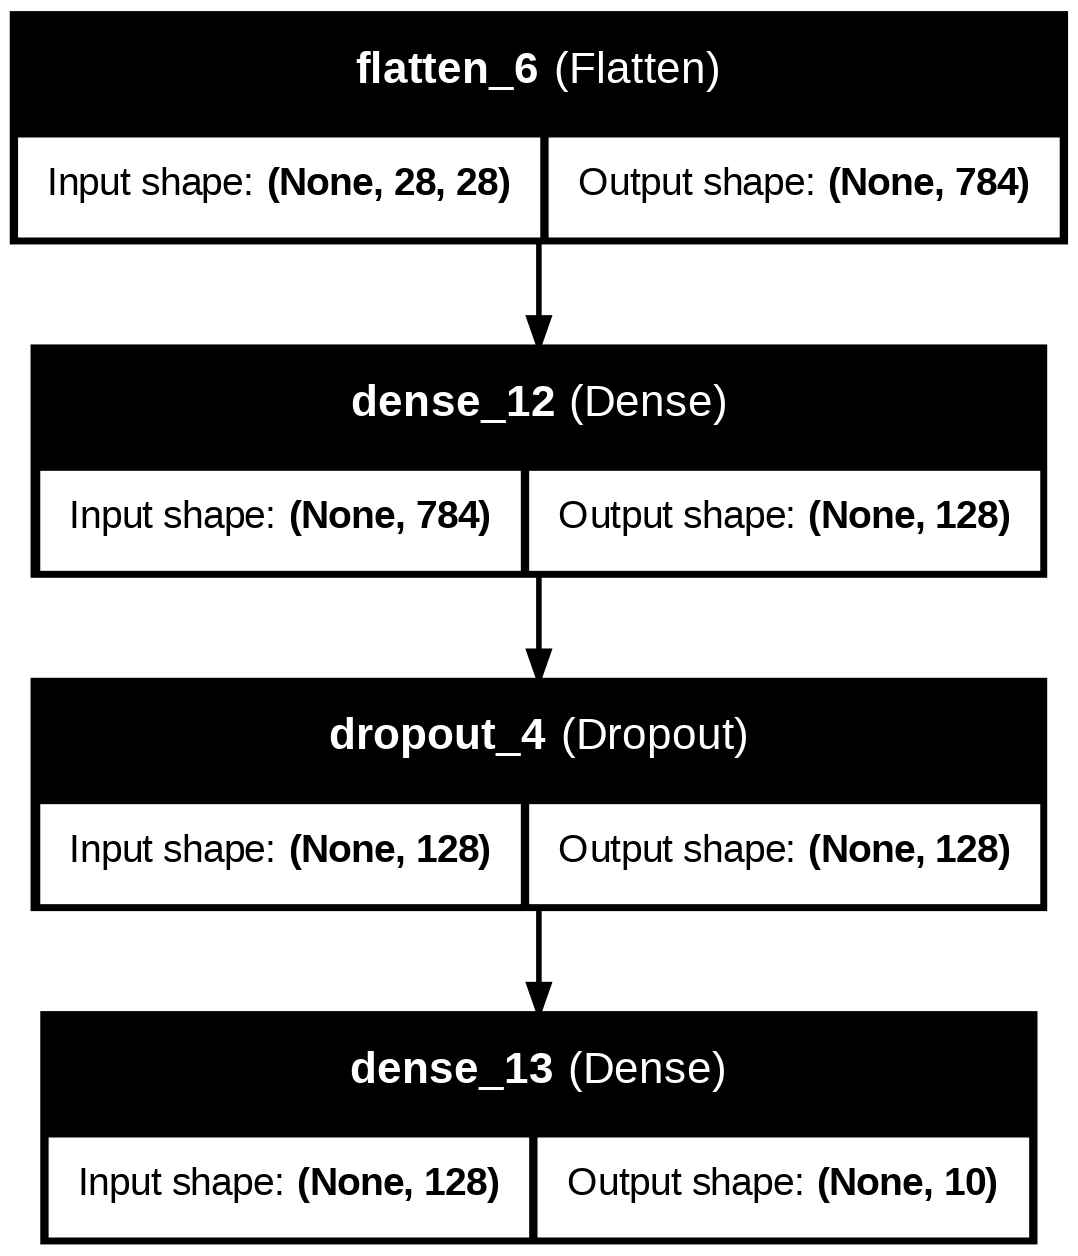

In [59]:
## -- Modelin eğitim süreci
model.fit(x_train, y_train, epochs=5)
## -- ^ fit metodu = Modelin verilen eğitim verileri üzerinde öğrenme sürecini başlatır.
## -- ^ x_train = giriş verileri olduğu veri kümesidir. MNIST veri setinde bu, el yazısı rakamlarını içeren görüntülerdir.
## -- ^ y_train = Modelin tahmin etmeye çalışacağı hedef değerlerdir. x_train içindeki her görüntünün hangi rakama ait olduğunu belirten değerlerdir (0-9 arası rakamlar).
## -- ^ epochs=5 = Modelin eğitim verileri üzerinde 5 kez tekrar edeceği anlamına gelir.

## -- Modeli görselleştirmek ve çalışma alanına kaydetmek için plot_model kullanımı
plot_model(model, to_file='ai_model/yz_tensoflow_model_ciktisi.png', show_shapes=True, show_layer_names=True) # Modelin Çıktısı


#### Performans Değerlendirmesi

In [60]:
# Test seti üzerinde modelin performansını değerlendirme

error_rate, success_rate = model.evaluate(x_test, y_test, verbose=2) ## -- evaluate metodu, iki değeri döndürür & verbose = 2 ,  daha ayrıntılı bilgi göstermeyi sağlar

print(" Accuracy of the Model  : %", success_rate*100)
print(" Error rate of the Model : %", error_rate*100)

313/313 - 1s - 3ms/step - accuracy: 0.9768 - loss: 0.0790
 Accuracy of the Model  : % 97.680002450943
 Error rate of the Model : % 7.903075963258743


# PyTorch Lib <>

In [61]:
!pip install torch torchvision torchaudio

In [62]:
import torch ## -- PyTorch'un temel kütüphanesini içe aktarır.
import torch.nn as nn ## -- PyTorch'un sinir ağı modüllerini içeren alt modülünü içe aktarır.
import torch.optim as optim ## -- PyTorch'un optimizasyon algoritmalarını içeren alt modülünü içe aktarır.
from torchvision import datasets, transforms ## -- torchvision =  Görüntü işleme ile ilgili işlevler sağlayan bir kütüphanedir.
import matplotlib.pyplot as plt

In [72]:
## -- MNIST veri setini yükleme
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

*-1 argümanı, PyTorch'un otomatik olarak doğru boyutu hesaplamasına olanak tanır.*

In [64]:
## --  Modeli oluşturma
class Net(nn.Module): ## -- Net adında bir sinir ağı modeli tanımlandırıldı.
    def __init__(self): ## -- Sınıfın yapıcı metodudur. Modelin katmanlarını tanımlamak için kullanılır.
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) ## -- İlk tam bağlı (fully connected) katmanı tanımlar. Giriş boyutu 28x28 olan veriyi alır ve 128 düğüme bağlar.
        self.fc2 = nn.Linear(128, 10) ## -- İkinci tam bağlı katmanı tanımlar. 128 düğümden gelen veriyi alır ve 10 düğüme bağlar.

    def forward(self, x): ## -- Modelin ileri besleme aşamasını tanımlar. Modelin girdi verileri ile nasıl çalıştığını belirler.
        x = x.view(-1, 28 * 28) ## -- 28x28 boyutundaki görüntüleri tek bir vektör haline getirir.
        x = torch.relu(self.fc1(x)) ## -- İlk katmandan (fc1) gelen veriyi alır, relu aktivasyon fonksiyonunu uygular ve sonucu x değişkenine atar.
        x = self.fc2(x) ## -- İkinci katmandan (fc2) gelen veriyi işler.
        return x ## -- modelin tahminlerini döndürür.

model = Net()

*Küçük bir öğrenme oranı, daha stabil ama yavaş bir öğrenmeyi sağlarken; büyük bir öğrenme oranı, daha hızlı öğrenmeyi ancak dalgalanmalara neden olabilecek bir yaklaşımı ifade eder.*

In [65]:
# -- Kayıp fonksiyonu ve optimizer
criterion = nn.CrossEntropyLoss() ## -- Kayıp fonksiyonu olarak CrossEntropyLoss kullanılır
optimizer = optim.SGD(model.parameters(), lr=0.01) ## -- lr=0.01: learning rate olarak belirlendi. Modelin ağırlıklarını güncellerken ne kadar değişiklik yapacağını belirler.

## -- Eğitim için boş listeler tanımla
train_losses = [] ## -- kayıp listesi
train_accuracies = [] ## -- doğruluk listesi

*batch = eğitim verilerinin küçük parçalara ,gruplara bölünmesidir.*


Epoch 1, Loss: 0.7425919441716757, Accuracy: 81.96%
Epoch 2, Loss: 0.3640245966660951, Accuracy: 89.57333333333334%
Epoch 3, Loss: 0.3182282742025501, Accuracy: 90.74833333333333%
Epoch 4, Loss: 0.2904222324204597, Accuracy: 91.69%
Epoch 5, Loss: 0.2683178793662774, Accuracy: 92.29%
Epoch 6, Loss: 0.2494108352913404, Accuracy: 92.88666666666667%
Epoch 7, Loss: 0.23176805511402931, Accuracy: 93.4%
Epoch 8, Loss: 0.21685726147121204, Accuracy: 93.84833333333333%
Epoch 9, Loss: 0.2033398526468511, Accuracy: 94.27333333333333%
Epoch 10, Loss: 0.19142002941194627, Accuracy: 94.635%
Epoch 11, Loss: 0.18085793035227987, Accuracy: 94.88%
Epoch 12, Loss: 0.1717595439046812, Accuracy: 95.22333333333333%
Epoch 13, Loss: 0.16314676492762908, Accuracy: 95.41%
Epoch 14, Loss: 0.15512779212868544, Accuracy: 95.68166666666667%
Epoch 15, Loss: 0.1485615839331802, Accuracy: 95.81%
Epoch 16, Loss: 0.14209080703937804, Accuracy: 95.99%
Epoch 17, Loss: 0.1360440350421615, Accuracy: 96.225%
Epoch 18, Loss: 

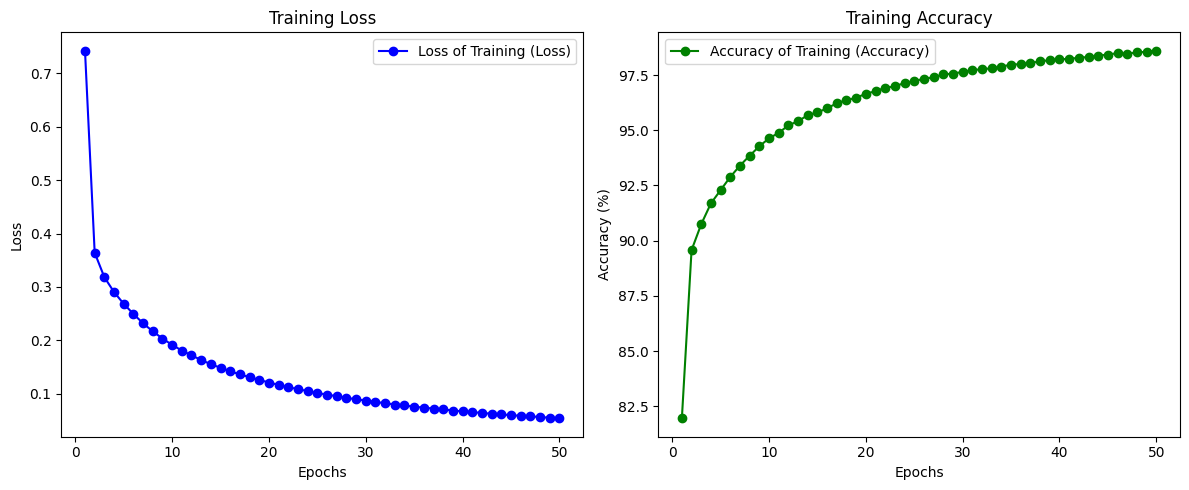

In [66]:
for epoch in range(50):  ## -- 50 epoch boyunca eğit
    running_loss = 0.0 ## -- Eğitim sırasında toplam kaybı (loss) tutmak için kullanılır. Her bir mini batchden gelen kayıpları toplamak için sıfırlanır.
    correct = 0 ## -- Modelin doğru tahmin ettiği örneklerin sayısını tutar.
    total = 0 ## -- Eğitim sırasında işlenen toplam örnek sayısını tutar.

    for images, labels in train_loader: ## -- eğitim verilerini mini batch'ler halinde döngüye sokar.

        optimizer.zero_grad() ## -- Her mini batch işlemine başlamadan önce, modelin ağırlıklarının gradyanlarını sıfırlar.
        output = model(images) ## -- Girdi olarak aldığı images üzerinde tahmin yapar ve çıktıyı (output) üretir.
        loss = criterion(output, labels) ## -- Modelin tahminleri ile gerçek labels arasındaki kaybı hesaplar.
        loss.backward() ## -- Kayıp fonksiyonunun gradyanını hesaplar ve modelin parametrelerinin güncellenmesi için backpropagation(geri yayılım) işlemi gerçekleştirir.
        optimizer.step() ## -- Hesaplanan gradyanlar kullanılarak modelin ağırlıkları güncellenir.

        ## -- Kayıp (loss) değerini topla
        running_loss += loss.item()

        ## -- Doğruluğu hesapla
        _, predicted = torch.max(output, 1) ## -- Modele ait output'dan her görüntü için en yüksek olasılığa sahip tahmini sınıfı bulur.
        total += labels.size(0) ## -- İşlenen mini batch'teki toplam örnek sayısını günceller.
        correct += (predicted == labels).sum().item()
        ## -- ^ Doğru tahminlerin sayısını günceller. Tahmin edilen sınıf ile gerçek etiket karşılaştırılır ve doğru tahminlerin sayısı toplanır.

   # Her epoch sonunda ortalama kayıp ve doğruluk
    epoch_loss = running_loss / len(train_loader) ## -- epoch_loss: Her epoch sonunda, eğitim kaybını hesaplar.
    ## -- ^ Toplam kaybı (running_loss), eğitim verilerini mini batch'ler halinde işlemek için kullanılan train_loader'ın uzunluğuna böler.
    epoch_accuracy = 100 * correct / total
    ## -- ^ Doğru tahmin edilen örnek sayısını (correct), toplam örnek sayısına (total) bölüp yüzde cinsine çevirir.
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    ## -- ^ Hesaplanan kayıp ve doğruluk değerleri, daha sonra grafiklerde kullanılmak içnn train_losses ve train_accuracies listelerine eklenir.

    print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}%') ## --  Sonuçları yazdırıyoruz

print('training completed !') ## -- epochs bittiği zaman ekrana eğiitmin bittiği yazdırılacak.

## -- Eğitim sonuçlarını grafikle gösterir
epochs = range(1, 51)  ## -- 50 epoch olduğu için 1'den 51'ya kadar olan epoch'lar
plt.figure(figsize=(12, 5))

## -- Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'bo-', label='Loss of Training (Loss)') ## -- bo- ifadesi, mavi renkli noktalarla ve hatlarla grafik çizer.
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## -- Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'go-', label='Accuracy of Training (Accuracy)') ## -- go- ifadesi, yeşil renkli noktalarla ve hatlarla grafik çizer.
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [68]:
## -- Modelin test verisi üzerinde performans değerlendirmesi
test_loss = 0.0
correct = 0
total = 0

## -- Test verisi üzerinde modelin kaybını ve doğruluğunu hesapla (gradyan hesaplama yok)
with torch.no_grad(): ## -- test sırasında modelin ağırlıklarının güncelleme yapmaz
    for images, labels in test_loader: ## -- test verisini mini batch'ler halinde döngüye sokar.
        output = model(images) ## -- test görüntüleri üzerinde tahmin yapar.
        loss = criterion(output, labels) ## -- Tahminler ile gerçek label'lar arasındaki kaybı hesaplar.
        test_loss += loss.item() ## -- Hesaplanan kayıp değeri toplam kayıp değerine eklenir.

        _, predicted = torch.max(output, 1) ## -- Modelin tahminleri arasından her görüntü için en yüksek olasılığa sahip tahmini sınıfı bulur.
        total += labels.size(0) ## -- İşlenen mini batch'teki toplam örnek sayısını günceller.
        correct += (predicted == labels).sum().item()
        ## -- ^ Tahmin edilen sınıf ile gerçek label karşılaştırılır ve doğru tahminlerin sayısı toplanır. = Doğru tahminlerin sayısını günceller.

## -- Test seti kaybı ve doğruluğu
test_loss /= len(test_loader) ## -- Toplam kaybı, test setindeki mini batch sayısına böler, böylece ortalama kaybı hesaplar.
test_accuracy = 100 * correct / total ## -- Doğru tahmin edilen örnek sayısını, toplam örnek sayısına bölüp yüzde'ye çevirir.

print("Test set loss : ", test_loss)
print("Test set accuracy : ", test_accuracy , "%")

Test set loss :  0.08655981103197084
Test set accuracy :  97.25 %


[Aktivasyon Fonksiyonları Nasıl Seçilir ?](https://devreyakan.com/aktivasyon-fonksiyonlari/)